In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm
from scipy.stats import poisson

from IPython.display import Image

import datetime

import warnings
warnings.filterwarnings("ignore")

In [100]:
df_train = pd.read_csv("E:\\Data Science\\Datasets\\HousePrices\\train_clear.csv")
df_test = pd.read_csv("E:\\Data Science\\Datasets\\HousePrices\\test.csv")

In [101]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,...,0,No,No,No,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,No,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,No,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,No,Reg,Lvl,AllPub,...,0,No,No,No,0,4,2010,WD,Normal,142125


Text(0.5, 1.0, 'Log Sale Prices Distribution')

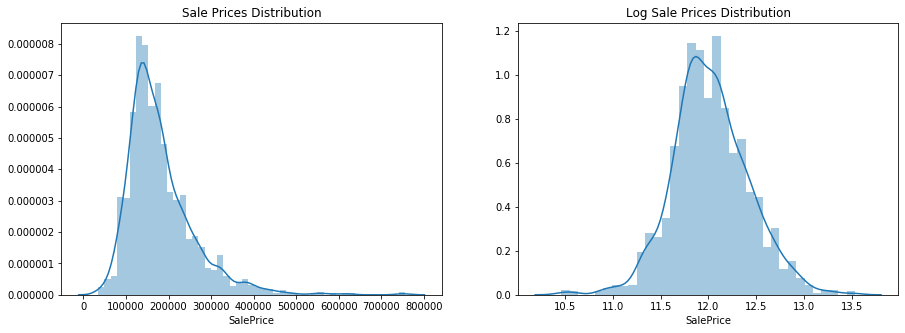

In [102]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(df_train["SalePrice"], ax=ax[0]).set_title("Sale Prices Distribution")
sns.distplot(np.log(df_train["SalePrice"]), ax=ax[1]).set_title("Log Sale Prices Distribution")

In [103]:
def max_len(arr):
    lengths = []
    for i in arr:
        lengths.append(len(i))
    return max(lengths)

In [104]:
count_factor = 0
count_num = 0

factor_cols = []

for col in df_train.columns:
    
    print(col + (max_len(df_train.columns) - len(col) + 4) * " " + str(df_train[col].dtype))
    
    if df_train[col].dtype == "object":
        factor_cols.append(col)
        count_factor += 1
    
    else:
        count_num += 1

print("\nNumeric: " + str(count_num), "    Factor: " + str(count_factor))

Id               int64
MSSubClass       int64
MSZoning         object
LotFrontage      float64
LotArea          int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1       int64
BsmtFinType2     object
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
Heating          object
HeatingQC        object
CentralAir       object
El

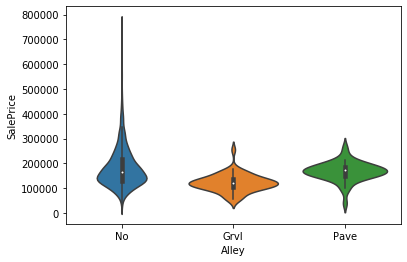

In [105]:
sns.violinplot(x="Alley", y="SalePrice", data=df_train)

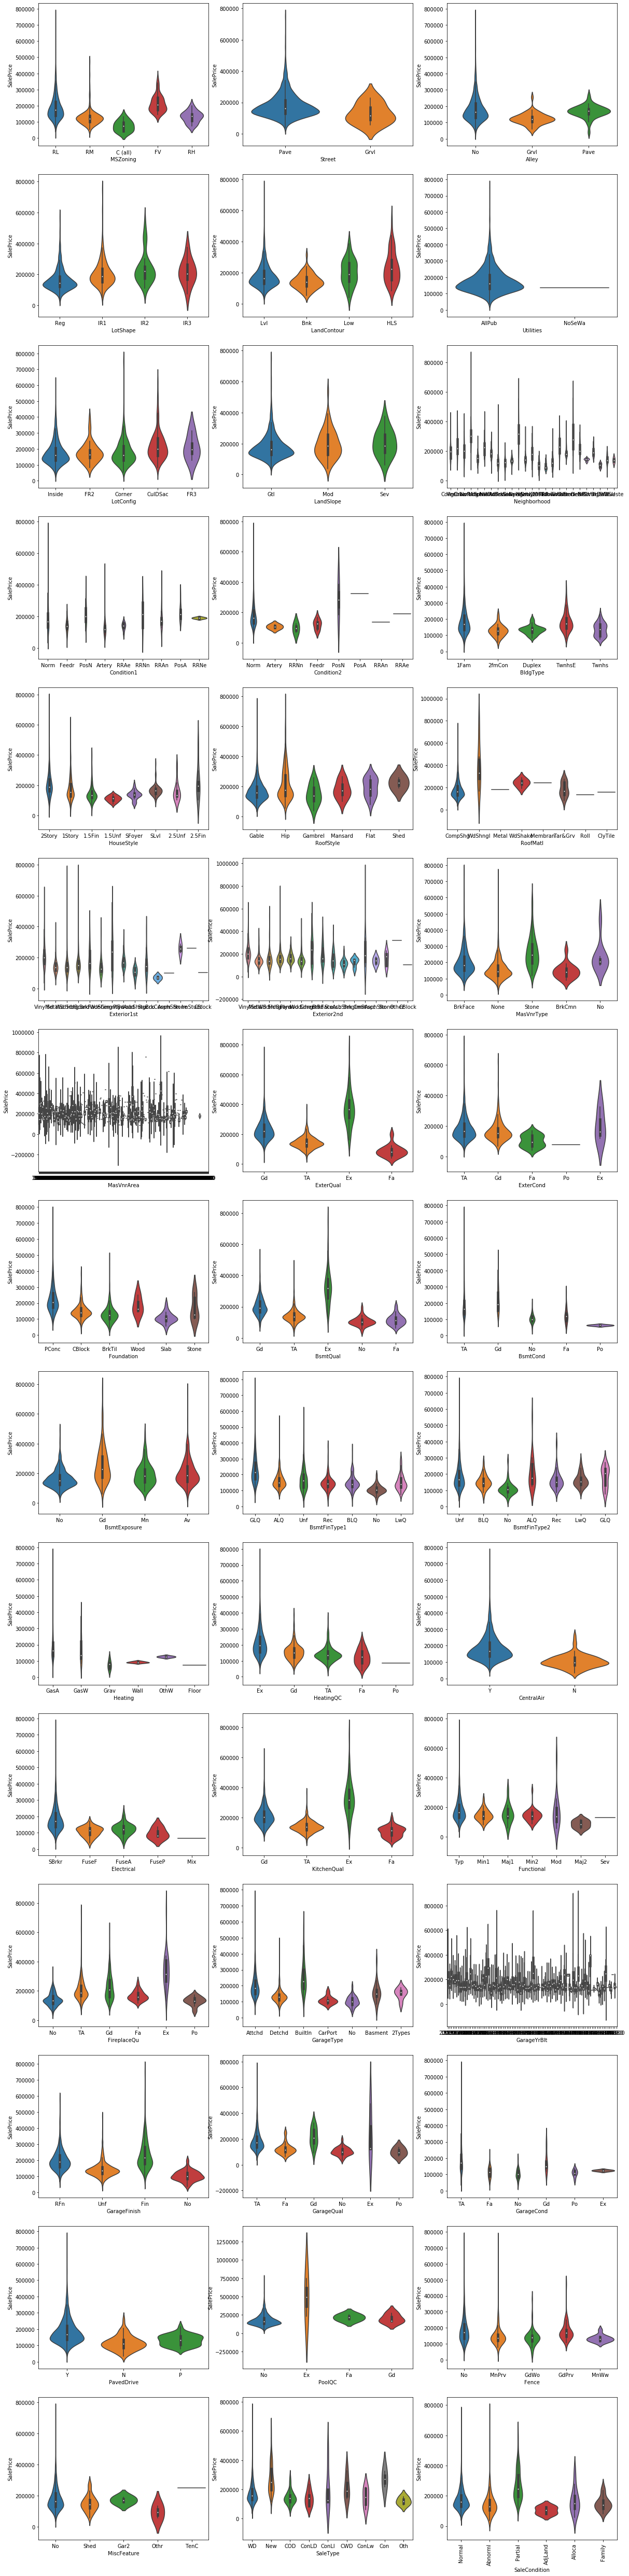

In [109]:
_, ax = plt.subplots(15, 3, figsize=(20, 90))

for i,col in enumerate(factor_cols):
    if i <= 2:
        sns.violinplot(x=col, y="SalePrice", data=df_train, ax=ax[i // 3, i])
    else:
        sns.violinplot(x=col, y="SalePrice", data=df_train, ax=ax[i // 3, i % 3])

plt.xticks(rotation=90)
plt.show()

Neighborhood, Condition2, (???)Exterior1st/2nd, ExterQual, MasVnrType are Statistically Affected

In [110]:
data = df_train[["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt", "ExterQual", "SalePrice"]].copy()

In [111]:
data.isna().sum()

OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
FullBath       0
YearBuilt      0
ExterQual      0
SalePrice      0
dtype: int64

In [112]:
data

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,ExterQual,SalePrice
0,7,1710,2,856,2,2003,Gd,208500
1,6,1262,2,1262,2,1976,TA,181500
2,7,1786,2,920,2,2001,Gd,223500
3,7,1717,3,756,1,1915,TA,140000
4,8,2198,3,1145,2,2000,Gd,250000
...,...,...,...,...,...,...,...,...
1455,6,1647,2,953,2,1999,TA,175000
1456,6,2073,2,1542,2,1978,TA,210000
1457,7,2340,1,1152,2,1941,Ex,266500
1458,5,1078,1,1078,1,1950,TA,142125


In [113]:
def get_scatter(df, var, clr='blue'):
    plt.figure(figsize=(10,7))
    plt.scatter(x=df[var], y=df["SalePrice"], marker='o', color=clr)
    plt.xlabel(var)
    plt.ylabel("SalePrice")
    plt.show()

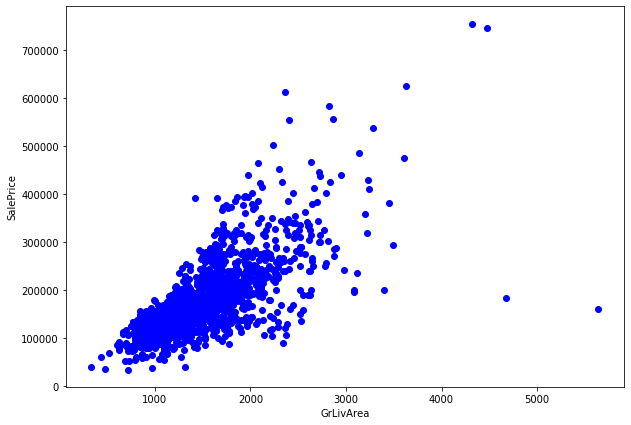

In [114]:
get_scatter(data, "GrLivArea")

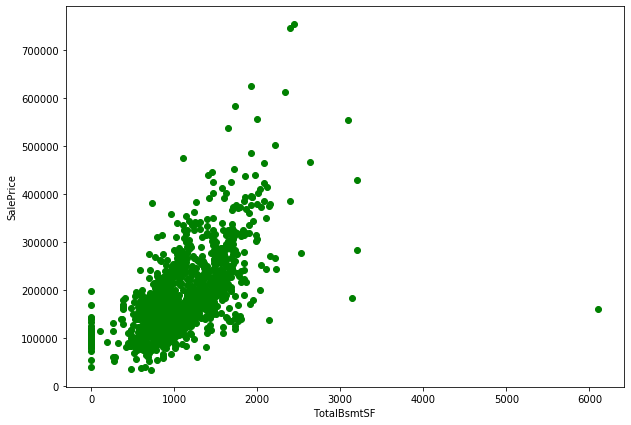

In [115]:
get_scatter(data, "TotalBsmtSF", clr='green')

In [116]:
data.drop(data[data["GrLivArea"] > 4500].index.values, inplace=True)
data.drop(data[data["TotalBsmtSF"] > 6000].index.values, inplace=True)

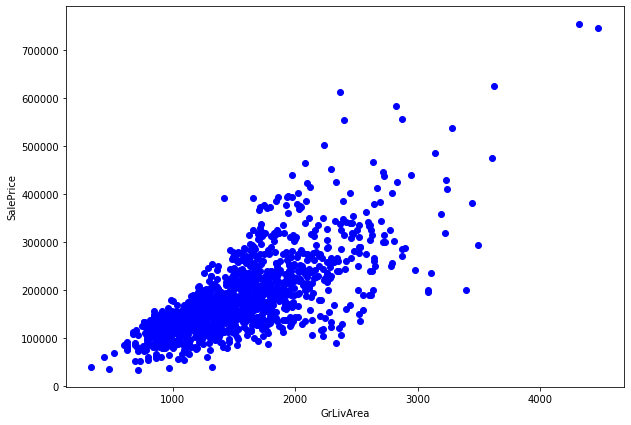

In [117]:
get_scatter(data, "GrLivArea")

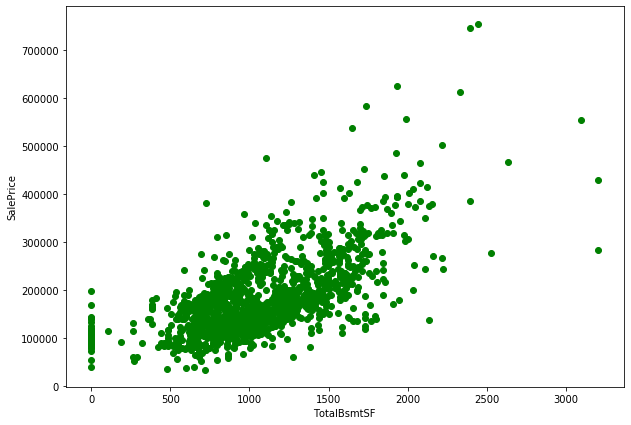

In [118]:
get_scatter(data, "TotalBsmtSF", clr='green')

In [128]:
data.SalePrice.values / data.SalePrice.std()

array([2.62280464, 2.28316088, 2.81149562, ..., 3.35240977, 1.78784705,
       1.85546132])

In [129]:
def normalize(df, col):
    df[col] = (df[col].values - df[col].mean()) / df[col].std()

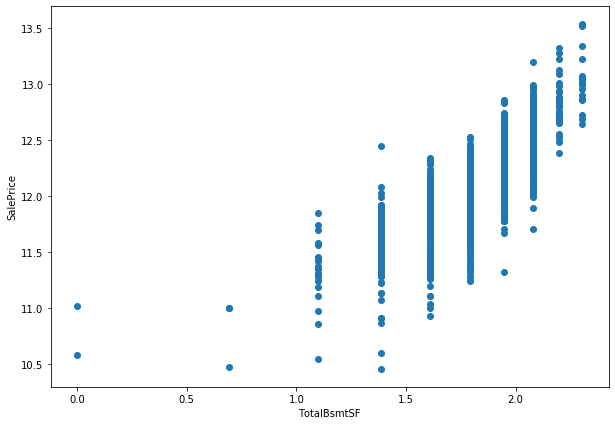

In [119]:
plt.figure(figsize=(10,7))
plt.scatter(x=np.log(data["OverallQual"]), y=np.log(data["SalePrice"]), marker='o')
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.show()

In [130]:
set(data.ExterQual)

{2, 3, 4, 5}

In [131]:
data.ExterQual.replace({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1}, inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int8)' and 'str'

In [132]:
data

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,ExterQual,SalePrice
0,7,1710,2,856,2,2003,4,208500
1,6,1262,2,1262,2,1976,3,181500
2,7,1786,2,920,2,2001,4,223500
3,7,1717,3,756,1,1915,3,140000
4,8,2198,3,1145,2,2000,4,250000
...,...,...,...,...,...,...,...,...
1455,6,1647,2,953,2,1999,3,175000
1456,6,2073,2,1542,2,1978,3,210000
1457,7,2340,1,1152,2,1941,5,266500
1458,5,1078,1,1078,1,1950,3,142125


In [74]:
data.MasVnrType.replace({'No' : 'None'}, inplace=True)

In [133]:
data

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,ExterQual,SalePrice
0,7,1710,2,856,2,2003,4,208500
1,6,1262,2,1262,2,1976,3,181500
2,7,1786,2,920,2,2001,4,223500
3,7,1717,3,756,1,1915,3,140000
4,8,2198,3,1145,2,2000,4,250000
...,...,...,...,...,...,...,...,...
1455,6,1647,2,953,2,1999,3,175000
1456,6,2073,2,1542,2,1978,3,210000
1457,7,2340,1,1152,2,1941,5,266500
1458,5,1078,1,1078,1,1950,3,142125


In [134]:
data['ExterQual'] = data['ExterQual'].astype("int8")

In [135]:
data.dtypes

OverallQual    int64
GrLivArea      int64
GarageCars     int64
TotalBsmtSF    int64
FullBath       int64
YearBuilt      int64
ExterQual       int8
SalePrice      int64
dtype: object

In [136]:
data["GrLivArea"] = np.log(data["GrLivArea"])
data["SalePrice"] = np.log(data["SalePrice"])
data

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,ExterQual,SalePrice
0,7,7.444249,2,856,2,2003,4,12.247694
1,6,7.140453,2,1262,2,1976,3,12.109011
2,7,7.487734,2,920,2,2001,4,12.317167
3,7,7.448334,3,756,1,1915,3,11.849398
4,8,7.695303,3,1145,2,2000,4,12.429216
...,...,...,...,...,...,...,...,...
1455,6,7.406711,2,953,2,1999,3,12.072541
1456,6,7.636752,2,1542,2,1978,3,12.254863
1457,7,7.757906,1,1152,2,1941,5,12.493130
1458,5,6.982863,1,1078,1,1950,3,11.864462


In [137]:
normalize(data, "TotalBsmtSF")
data

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,ExterQual,SalePrice
0,7,7.444249,2,-0.473603,2,2003,4,12.247694
1,6,7.140453,2,0.504752,2,1976,3,12.109011
2,7,7.487734,2,-0.319380,2,2001,4,12.317167
3,7,7.448334,3,-0.714578,1,1915,3,11.849398
4,8,7.695303,3,0.222812,2,2000,4,12.429216
...,...,...,...,...,...,...,...,...
1455,6,7.406711,2,-0.239859,2,1999,3,12.072541
1456,6,7.636752,2,1.179479,2,1978,3,12.254863
1457,7,7.757906,1,0.239680,2,1941,5,12.493130
1458,5,6.982863,1,0.061359,1,1950,3,11.864462


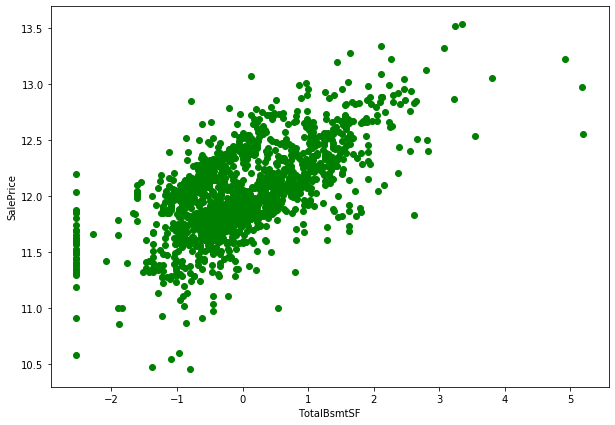

In [138]:
get_scatter(data, "TotalBsmtSF", clr='green')

In [79]:
#data["TotalBsmtSF"] = np.log(data["TotalBsmtSF"])
data["SalePrice"] = np.log(data["SalePrice"])

In [139]:
data

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,ExterQual,SalePrice
0,7,7.444249,2,-0.473603,2,2003,4,12.247694
1,6,7.140453,2,0.504752,2,1976,3,12.109011
2,7,7.487734,2,-0.319380,2,2001,4,12.317167
3,7,7.448334,3,-0.714578,1,1915,3,11.849398
4,8,7.695303,3,0.222812,2,2000,4,12.429216
...,...,...,...,...,...,...,...,...
1455,6,7.406711,2,-0.239859,2,1999,3,12.072541
1456,6,7.636752,2,1.179479,2,1978,3,12.254863
1457,7,7.757906,1,0.239680,2,1941,5,12.493130
1458,5,6.982863,1,0.061359,1,1950,3,11.864462


In [81]:
data = pd.get_dummies(data)

In [140]:
test = df_test[["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt", "ExterQual"]].copy()

In [141]:
test.ExterQual.replace({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1}, inplace=True)

In [142]:
test

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,ExterQual
0,5,896,1.0,882.0,1,1961,3
1,6,1329,1.0,1329.0,1,1958,3
2,5,1629,2.0,928.0,2,1997,3
3,6,1604,2.0,926.0,2,1998,3
4,8,1280,2.0,1280.0,2,1992,4
...,...,...,...,...,...,...,...
1454,4,1092,0.0,546.0,1,1970,3
1455,4,1092,1.0,546.0,1,1970,3
1456,5,1224,2.0,1224.0,1,1960,3
1457,5,970,0.0,912.0,1,1992,3


In [143]:
test.isna().sum()

OverallQual    0
GrLivArea      0
GarageCars     1
TotalBsmtSF    1
FullBath       0
YearBuilt      0
ExterQual      0
dtype: int64

In [145]:
#test.MasVnrType.fillna('None', inplace=True)
test.GarageCars.fillna(test['GarageCars'].mode().max(), inplace=True)
test.TotalBsmtSF.fillna(test['TotalBsmtSF'].mode().max(), inplace=True)

In [146]:
test.isna().sum()

OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
FullBath       0
YearBuilt      0
ExterQual      0
dtype: int64

In [147]:
test.ExterQual = test.ExterQual.astype("int8")
test.dtypes

OverallQual      int64
GrLivArea        int64
GarageCars     float64
TotalBsmtSF    float64
FullBath         int64
YearBuilt        int64
ExterQual         int8
dtype: object

In [148]:
test

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,ExterQual
0,5,896,1.0,882.0,1,1961,3
1,6,1329,1.0,1329.0,1,1958,3
2,5,1629,2.0,928.0,2,1997,3
3,6,1604,2.0,926.0,2,1998,3
4,8,1280,2.0,1280.0,2,1992,4
...,...,...,...,...,...,...,...
1454,4,1092,0.0,546.0,1,1970,3
1455,4,1092,1.0,546.0,1,1970,3
1456,5,1224,2.0,1224.0,1,1960,3
1457,5,970,0.0,912.0,1,1992,3


In [149]:
#test["TotalBsmtSF"] = np.log(test["TotalBsmtSF"])
test["GrLivArea"] = np.log(test["GrLivArea"])
normalize(test, "TotalBsmtSF")

In [150]:
test

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,ExterQual
0,5,6.797940,1.0,-0.368358,1,1961,3
1,6,7.192182,1.0,0.639323,1,1958,3
2,5,7.395722,2.0,-0.264659,2,1997,3
3,6,7.380256,2.0,-0.269168,2,1998,3
4,8,7.154615,2.0,0.528861,2,1992,4
...,...,...,...,...,...,...,...
1454,4,6.995766,0.0,-1.125809,1,1970,3
1455,4,6.995766,1.0,-1.125809,1,1970,3
1456,5,7.109879,2.0,0.402619,1,1960,3
1457,5,6.877296,0.0,-0.300728,1,1992,3


In [91]:
test = pd.get_dummies(test)
test

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,ExterQual,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,...,Neighborhood_Veenker,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,5,6.797940,1.0,882.0,1,1961,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,6,7.192182,1.0,1329.0,1,1958,3,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,5,7.395722,2.0,928.0,2,1997,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,6,7.380256,2.0,926.0,2,1998,3,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,8,7.154615,2.0,1280.0,2,1992,4,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,6.995766,0.0,546.0,1,1970,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1455,4,6.995766,1.0,546.0,1,1970,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,5,7.109879,2.0,1224.0,1,1960,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,5,6.877296,0.0,912.0,1,1992,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [151]:
data.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
       'YearBuilt', 'ExterQual', 'SalePrice'],
      dtype='object')

In [152]:
test.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
       'YearBuilt', 'ExterQual'],
      dtype='object')

In [94]:
test['Condition2_RRAe'] = 0
test['Condition2_RRAn'] = 0
test['Condition2_RRNn'] = 0

In [95]:
test = test[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
       'YearBuilt', 'ExterQual', 'Neighborhood_Blmngtn',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm',
       'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe',
       'Condition2_RRAn', 'Condition2_RRNn', 'MasVnrType_BrkCmn',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone']]

In [96]:
test

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,ExterQual,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,...,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,5,6.797940,1.0,882.0,1,1961,3,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,6,7.192182,1.0,1329.0,1,1958,3,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,5,7.395722,2.0,928.0,2,1997,3,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,6,7.380256,2.0,926.0,2,1998,3,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,8,7.154615,2.0,1280.0,2,1992,4,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,6.995766,0.0,546.0,1,1970,3,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1455,4,6.995766,1.0,546.0,1,1970,3,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1456,5,7.109879,2.0,1224.0,1,1960,3,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1457,5,6.877296,0.0,912.0,1,1992,3,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [97]:
data

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,ExterQual,SalePrice,Neighborhood_Blmngtn,Neighborhood_Blueste,...,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,7,7.444249,2,856,2,2003,4,12.247694,0,0,...,1,0,0,0,0,0,0,1,0,0
1,6,7.140453,2,1262,2,1976,3,12.109011,0,0,...,1,0,0,0,0,0,0,0,1,0
2,7,7.487734,2,920,2,2001,4,12.317167,0,0,...,1,0,0,0,0,0,0,1,0,0
3,7,7.448334,3,756,1,1915,3,11.849398,0,0,...,1,0,0,0,0,0,0,0,1,0
4,8,7.695303,3,1145,2,2000,4,12.429216,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,7.406711,2,953,2,1999,3,12.072541,0,0,...,1,0,0,0,0,0,0,0,1,0
1456,6,7.636752,2,1542,2,1978,3,12.254863,0,0,...,1,0,0,0,0,0,0,0,0,1
1457,7,7.757906,1,1152,2,1941,5,12.493130,0,0,...,1,0,0,0,0,0,0,0,1,0
1458,5,6.982863,1,1078,1,1950,3,11.864462,0,0,...,1,0,0,0,0,0,0,0,1,0


In [153]:
data.to_csv("E:\\Data Science\\Datasets\\HousePrices\\data" + str(datetime.date.today()) + "2.csv", index=False)
test.to_csv("E:\\Data Science\\Datasets\\HousePrices\\data_test" + str(datetime.date.today()) + "2.csv", index=False)

In [154]:
test.isna().sum()

OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
FullBath       0
YearBuilt      0
ExterQual      0
dtype: int64